Ultimate Load (wu): 31.5 kN/m
Maximum Bending Moment (Mu): 141.75 kN·m
Required Steel Area (Ast): 714.77 mm²
Ultimate Shear Force (Vu): 94.5 kN
Nominal Shear Stress (τv): 0.63 MPa
Shear stress exceeds limit. Provide shear reinforcement.


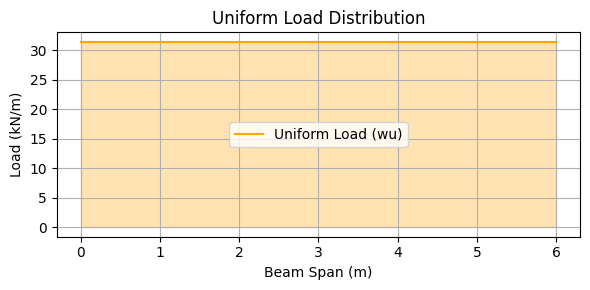

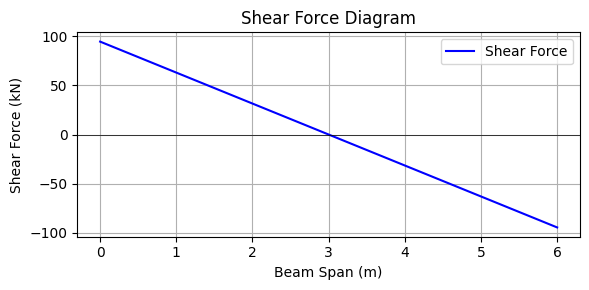

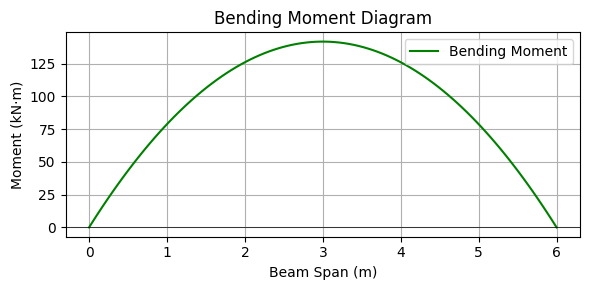


Reinforcement Options:
7 bars of 12 mm (each area: 113.1 mm²) → total: 791.7 mm²
4 bars of 16 mm (each area: 201.1 mm²) → total: 804.2 mm²
3 bars of 20 mm (each area: 314.2 mm²) → total: 942.5 mm²
2 bars of 25 mm (each area: 490.9 mm²) → total: 981.7 mm²

✅ Recommended: Use 2 bars of 25 mm diameter


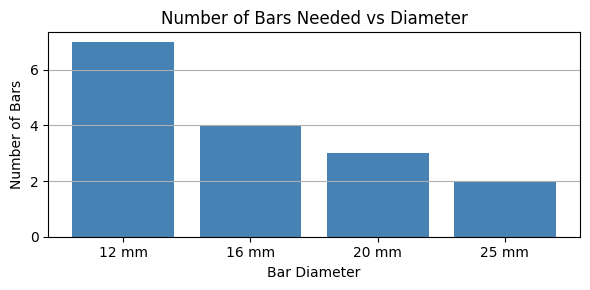

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Given parameters
span_m = 6  # meters
trib_width_m = 3  # meters
DL_kN_per_m2 = 4.5
LL_kN_per_m2 = 2.5

# Material properties
fck = 25  # MPa
fy = 500  # MPa

# Beam dimensions
b_mm = 300
d_mm = 500
b = b_mm / 1000
d = d_mm / 1000

# Load calculations
w_dead = DL_kN_per_m2 * trib_width_m
w_live = LL_kN_per_m2 * trib_width_m
wu = 1.5 * (w_dead + w_live)  # kN/m

# Moment and shear
Mu = (wu * span_m**2) / 8  # kN·m
Mu_Nmm = Mu * 1e6
Ast = (Mu_Nmm) / (0.87 * fy * d_mm * (1 - (0.42 * (Mu_Nmm / (0.36 * fck * b_mm * d_mm**2)))))
Ast = round(Ast, 2)
Vu = wu * span_m / 2  # kN
tau_v = (Vu * 1000) / (b_mm * d_mm)

# Print summary
print("Ultimate Load (wu):", round(wu, 2), "kN/m")
print("Maximum Bending Moment (Mu):", round(Mu, 2), "kN·m")
print("Required Steel Area (Ast):", Ast, "mm²")
print("Ultimate Shear Force (Vu):", round(Vu, 2), "kN")
print("Nominal Shear Stress (τv):", round(tau_v, 3), "MPa")

tau_c = 0.36
if tau_v < tau_c:
    print("Shear stress is within safe limits.")
else:
    print("Shear stress exceeds limit. Provide shear reinforcement.")

# ====================
# Plotting
# ====================

x = np.linspace(0, span_m, 100)

# 1. Load Distribution (Uniform Load)
plt.figure(figsize=(6, 3))
plt.plot(x, np.full_like(x, wu), label="Uniform Load (wu)", color='orange')
plt.fill_between(x, 0, wu, alpha=0.3, color='orange')
plt.title("Uniform Load Distribution")
plt.xlabel("Beam Span (m)")
plt.ylabel("Load (kN/m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Shear Force Diagram (SFD)
V = (wu * span_m / 2) - wu * x
plt.figure(figsize=(6, 3))
plt.plot(x, V, label="Shear Force", color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Shear Force Diagram")
plt.xlabel("Beam Span (m)")
plt.ylabel("Shear Force (kN)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Bending Moment Diagram (BMD)
M = (wu * x * (span_m - x)) / 2
plt.figure(figsize=(6, 3))
plt.plot(x, M, label="Bending Moment", color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Bending Moment Diagram")
plt.xlabel("Beam Span (m)")
plt.ylabel("Moment (kN·m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# ============ Reinforcement Bar Selection ============

# Available bar diameters in mm
bar_diameters = [12, 16, 20, 25]

# Function to calculate bar area
def bar_area(d):
    return (math.pi * d**2) / 4  # mm²

# Calculate number of bars for each diameter
bar_data = []
for dia in bar_diameters:
    area = bar_area(dia)
    num_bars = math.ceil(Ast / area)
    bar_data.append((dia, area, num_bars))

# Display reinforcement bar info
print("\nReinforcement Options:")
for dia, area, n in bar_data:
    print(f"{n} bars of {dia} mm (each area: {round(area,1)} mm²) → total: {round(n*area,1)} mm²")

# Choose optimal (fewest bars)
best_dia, best_area, best_n = min(bar_data, key=lambda x: x[2])
print(f"\n✅ Recommended: Use {best_n} bars of {best_dia} mm diameter")

# ============ Plotting Reinforcement Selection ============
# Plot number of bars needed for each diameter
diameters = [x[0] for x in bar_data]
bars_needed = [x[2] for x in bar_data]

plt.figure(figsize=(6, 3))
plt.bar([str(d) + " mm" for d in diameters], bars_needed, color='steelblue')
plt.title("Number of Bars Needed vs Diameter")
plt.xlabel("Bar Diameter")
plt.ylabel("Number of Bars")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

